# Let's see if it's working

In [1]:
import torch

import matplotlib.pyplot as plt

from nn.sequential import *
from nn.activation import *
from nn.linear import *
from nn.loss import *
from trainer import Trainer

In [2]:
def gen_data(n):
    x = torch.rand((2 * n, 2))
    pi = torch.acos(torch.zeros(1)).item() * 2
    target = ((x - torch.Tensor([0.5, 0.5])).pow(2).sum(dim=1) <= 1/(2*pi)) * 1

    x_train, x_test = x[:n], x[n:]
    y_train, y_test = target[:n], target[n:]
    return x_train, x_test, y_train.view(-1, 1), y_test.view(-1, 1)

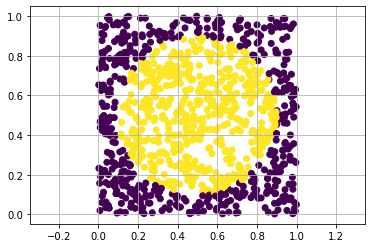

In [3]:
# Create test data
x_train, x_test, y_train, y_test = gen_data(1000)

# Plot test data
plt.scatter(x_train.numpy()[:,0], x_train.numpy()[:,1], c=y_train[:, 0])
plt.axis('equal')
plt.grid()
plt.show()

In [4]:
y_train = y_train.float()

In [5]:
y_test = y_test.float()

In [6]:
LinNet_ours = Sequential((
    Linear(2, 25),
    ReLU(),
    Linear(25, 25),
    ReLU(),
    Linear(25, 25),
    ReLU(),
    Linear(25, 1)),
    MSELoss()
)

LinNet_theirs = torch.nn.Sequential(
    torch.nn.Linear(2, 25),
    torch.nn.ReLU(),
    torch.nn.Linear(25, 25),
    torch.nn.ReLU(),
    torch.nn.Linear(25, 25),
    torch.nn.ReLU(),
    torch.nn.Linear(25, 1)
)
print(f'ours {LinNet_ours}, theirs {LinNet_theirs}')

print(Linear(25, 25))

ours Sequential(
	(0): Linear(in_features=2, out_features=25, bias=True)
	(1): ReLU()
	(2): Linear(in_features=25, out_features=25, bias=True)
	(3): ReLU()
	(4): Linear(in_features=25, out_features=25, bias=True)
	(5): ReLU()
	(6): Linear(in_features=25, out_features=1, bias=True)
), theirs Sequential(
  (0): Linear(in_features=2, out_features=25, bias=True)
  (1): ReLU()
  (2): Linear(in_features=25, out_features=25, bias=True)
  (3): ReLU()
  (4): Linear(in_features=25, out_features=25, bias=True)
  (5): ReLU()
  (6): Linear(in_features=25, out_features=1, bias=True)
)
Linear(in_features=25, out_features=25, bias=True)


In [7]:
out_ours = LinNet_ours(x_train)

In [8]:
out_theirs = LinNet_theirs(x_train)

In [9]:
out_ours

tensor([[0.6529],
        [0.6672],
        [0.6473],
        [0.6557],
        [0.6549],
        [0.6636],
        [0.6503],
        [0.6534],
        [0.6476],
        [0.6656],
        [0.6556],
        [0.6467],
        [0.6638],
        [0.6472],
        [0.6484],
        [0.6470],
        [0.6465],
        [0.6487],
        [0.6477],
        [0.6494],
        [0.6505],
        [0.6469],
        [0.6475],
        [0.6487],
        [0.6557],
        [0.6635],
        [0.6631],
        [0.6474],
        [0.6542],
        [0.6541],
        [0.6503],
        [0.6477],
        [0.6589],
        [0.6576],
        [0.6475],
        [0.6474],
        [0.6606],
        [0.6509],
        [0.6560],
        [0.6492],
        [0.6472],
        [0.6572],
        [0.6600],
        [0.6491],
        [0.6490],
        [0.6485],
        [0.6520],
        [0.6665],
        [0.6485],
        [0.6494],
        [0.6526],
        [0.6474],
        [0.6470],
        [0.6464],
        [0.6649],
        [0

In [10]:
out_theirs

tensor([[-0.0500],
        [-0.0228],
        [-0.0198],
        [-0.0534],
        [-0.0473],
        [-0.0196],
        [-0.0229],
        [-0.0405],
        [-0.0403],
        [-0.0258],
        [-0.0265],
        [-0.0298],
        [-0.0209],
        [-0.0315],
        [-0.0238],
        [-0.0307],
        [-0.0262],
        [-0.0364],
        [-0.0391],
        [-0.0421],
        [-0.0436],
        [-0.0301],
        [-0.0199],
        [-0.0256],
        [-0.0236],
        [-0.0367],
        [-0.0319],
        [-0.0382],
        [-0.0435],
        [-0.0508],
        [-0.0242],
        [-0.0389],
        [-0.0370],
        [-0.0208],
        [-0.0273],
        [-0.0401],
        [-0.0205],
        [-0.0354],
        [-0.0230],
        [-0.0236],
        [-0.0373],
        [-0.0510],
        [-0.0234],
        [-0.0212],
        [-0.0257],
        [-0.0467],
        [-0.0520],
        [-0.0288],
        [-0.0388],
        [-0.0253],
        [-0.0505],
        [-0.0344],
        [-0.

In [11]:
# not the same 

In [12]:
loss_ours = LinNet_ours.loss(out_ours, y_train)

In [13]:
loss_fn_theirs = torch.nn.MSELoss()

In [14]:
loss_theirs = loss_fn_theirs(out_theirs, y_train)

In [15]:
loss_ours

tensor(0.2715)

In [16]:
loss_theirs

tensor(0.5468, grad_fn=<MseLossBackward>)

In [17]:
# not the same 

In [18]:
LinNet_ours.backward()

In [19]:
LinNet_ours.update_params(optim='sgd', lr=0.01)

In [20]:
opt_theirs = torch.optim.SGD(LinNet_theirs.parameters(), lr=0.01)

In [21]:
opt_theirs.zero_grad()

In [22]:
loss_theirs.backward()

In [23]:
opt_theirs.step()

In [24]:
mod_ours = LinNet_ours.modules

In [25]:
mod_ours

(<nn.linear.Linear at 0x7fddede86a60>,
 <nn.linear.Linear at 0x7fddede86c40>)

In [26]:
mod_theirs = list(LinNet_theirs.children())

In [27]:
mod_theirs

[Linear(in_features=2, out_features=25, bias=True),
 ReLU(),
 Linear(in_features=25, out_features=25, bias=True),
 ReLU(),
 Linear(in_features=25, out_features=25, bias=True),
 ReLU(),
 Linear(in_features=25, out_features=1, bias=True)]

In [28]:
for m_ours, m_theirs in zip(mod_ours, mod_theirs):
    # for activation layers
    if 'w' not in m_ours.cache:
        break
    # here for sure the weight is the transpose 
    w_ours = m_ours.cache['w'].t()
    w_theirs = m_theirs.weight
    print('weight ours', w_ours)
    print('weight theirs', w_theirs)
    b_ours = m_ours.cache['b']
    b_theirs = m_theirs.bias
    print('bias ours', b_ours)
    print('bias theirs', b_theirs)
    

weight ours tensor([[ 0.1663, -0.1139],
        [ 0.1303,  0.0440],
        [-0.1278,  0.0827],
        [ 0.0215, -0.0451],
        [ 0.1394,  0.1754],
        [ 0.0208, -0.0168],
        [-0.1921, -0.0640],
        [-0.1795,  0.0209],
        [ 0.0400,  0.0294],
        [ 0.1925, -0.0575],
        [-0.0681,  0.1621],
        [-0.1785, -0.0819],
        [ 0.0145,  0.0516],
        [-0.1290, -0.0157],
        [-0.0462, -0.0170],
        [-0.1403,  0.0274],
        [-0.0993, -0.0990],
        [ 0.1778,  0.1396],
        [-0.1576, -0.0416],
        [ 0.0442,  0.0081],
        [ 0.1889, -0.0656],
        [-0.1014, -0.1637],
        [ 0.0391,  0.0661],
        [ 0.1852, -0.0017],
        [ 0.1978,  0.0963]])
weight theirs Parameter containing:
tensor([[-0.5773,  0.3279],
        [-0.2215, -0.1730],
        [ 0.3919,  0.3160],
        [-0.2773,  0.4727],
        [ 0.3607,  0.2656],
        [ 0.1824,  0.0090],
        [-0.6750,  0.3846],
        [-0.1248,  0.2097],
        [ 0.5510, -0.0152],

In [29]:
# trainer stuff

In [30]:
t = Trainer(nb_epochs=321)
_ = t.fit(LinNet_ours, x_train, y_train, x_test, y_test, batch_size=32)

# Epoch 1/321:	 loss=0.25	 loss_val=0.25
# Epoch 33/321:	 loss=0.24	 loss_val=0.24
# Epoch 65/321:	 loss=0.23	 loss_val=0.23
# Epoch 97/321:	 loss=0.21	 loss_val=0.21
# Epoch 129/321:	 loss=0.15	 loss_val=0.14
# Epoch 161/321:	 loss=0.1	 loss_val=0.1
# Epoch 193/321:	 loss=0.08	 loss_val=0.09
# Epoch 225/321:	 loss=0.08	 loss_val=0.09
# Epoch 257/321:	 loss=0.07	 loss_val=0.09
# Epoch 289/321:	 loss=0.07	 loss_val=0.09
# Epoch 321/321:	 loss=0.07	 loss_val=0.09


In [59]:
# Iterate over samples in x
loss_fn_theirs = torch.nn.MSELoss()
optimizer_theirs = torch.optim.SGD(LinNet_theirs.parameters(), lr=0.01)
train_loss_ours = []
train_loss_theirs = []
n_epochs = 150
batch_size = 32
for e in range(n_epochs):
    for i in range(0, len(x_train), batch_size):
        # Get one data sample
        x_sample = x_train[i:i+batch_size]
        y_sample = y_train[i:i+batch_size].float()

        # Forward ours
        out_ours = LinNet_ours(x_sample)
        loss_ours = LinNet_ours.loss(out_ours, y_sample)
        train_loss_ours.append(loss_ours)
        print(f'our ours: {out_ours}')

        # Forward theirs
        out_theirs = LinNet_theirs(x_sample)
        loss_theirs = loss_fn_theirs(out_theirs, y_sample)
        train_loss_theirs.append(loss_theirs.item())
        print(f'our theirs: {out_theirs}')

        # Backward ours
        LinNet_ours.backward()

        # Backward theirs
        optimizer_theirs.zero_grad()
        loss_theirs.backward()
        optimizer_theirs.step()

        # Update params
        LinNet_ours.update_params(optim='sgd', lr=0.01)
    print(f'finished epoch {e} with train loss: {sum(train_loss_ours)/len(train_loss_ours)} (ours), {sum(train_loss_theirs)/len(train_loss_theirs)} (theirs)')

our ours: tensor([[ 1.0840e+00],
        [ 2.0356e-01],
        [ 8.1907e-01],
        [ 6.2060e-01],
        [ 2.8525e-01],
        [ 5.2732e-02],
        [-2.0310e-01],
        [-8.8146e-02],
        [ 8.0932e-01],
        [ 5.0261e-01],
        [-1.2649e-01],
        [-1.7853e-02],
        [ 2.8386e-01],
        [ 2.4244e-02],
        [ 1.7331e-01],
        [ 9.9127e-02],
        [ 8.9801e-01],
        [ 8.0865e-02],
        [ 1.2161e-02],
        [ 7.6828e-01],
        [ 1.0214e+00],
        [-8.9297e-02],
        [ 3.9530e-01],
        [ 6.4478e-01],
        [ 1.0149e+00],
        [ 6.4840e-01],
        [ 2.1825e-01],
        [ 4.7570e-01],
        [ 6.8732e-02],
        [ 2.2250e-01],
        [-5.0461e-04],
        [ 4.7475e-02]])
our theirs: tensor([[0.0600],
        [0.0505],
        [0.0565],
        [0.0613],
        [0.0546],
        [0.0513],
        [0.0671],
        [0.0482],
        [0.0594],
        [0.0628],
        [0.0586],
        [0.0491],
        [0.0508],
       

our ours: tensor([[ 0.0288],
        [ 1.2633],
        [ 0.5397],
        [ 1.2215],
        [ 0.1577],
        [ 1.3129],
        [ 0.7842],
        [ 0.1271],
        [ 0.1831],
        [ 0.2605],
        [ 1.2753],
        [ 1.0546],
        [ 1.2087],
        [ 0.9058],
        [ 1.0021],
        [ 1.1399],
        [ 0.3131],
        [ 0.0318],
        [ 0.0207],
        [ 0.5867],
        [ 1.0416],
        [ 0.4185],
        [ 0.5156],
        [ 1.3621],
        [-0.0189],
        [ 0.8434],
        [ 0.6983],
        [ 1.1210],
        [ 0.8982],
        [ 0.4051],
        [ 0.8142],
        [-0.0769]])
our theirs: tensor([[0.4978],
        [0.4911],
        [0.4935],
        [0.4873],
        [0.4812],
        [0.4935],
        [0.4815],
        [0.4951],
        [0.4742],
        [0.5002],
        [0.5042],
        [0.4900],
        [0.5040],
        [0.4879],
        [0.5022],
        [0.4959],
        [0.4751],
        [0.4712],
        [0.4798],
        [0.4795],
        [

our ours: tensor([[ 1.1562],
        [-0.0134],
        [ 0.1404],
        [ 0.3642],
        [ 0.7116],
        [ 0.2629],
        [ 0.9019],
        [ 0.4003],
        [ 0.0746],
        [ 0.6342],
        [ 0.0209],
        [ 0.3980],
        [-0.0866],
        [-0.1275],
        [ 0.7183],
        [ 0.9575],
        [ 0.0419],
        [ 0.3615],
        [ 0.5118],
        [ 1.0995],
        [ 1.0422],
        [ 0.3426],
        [ 0.6928],
        [ 0.9556],
        [ 0.0452],
        [-0.1127],
        [ 0.0487],
        [ 0.0700],
        [ 1.1107],
        [ 0.1455],
        [ 0.7144],
        [ 0.1278]])
our theirs: tensor([[0.5049],
        [0.4776],
        [0.5098],
        [0.5166],
        [0.5065],
        [0.4935],
        [0.5177],
        [0.4861],
        [0.5167],
        [0.4976],
        [0.4797],
        [0.5166],
        [0.4732],
        [0.4751],
        [0.4948],
        [0.5089],
        [0.4970],
        [0.4876],
        [0.5092],
        [0.5170],
        [

our theirs: tensor([[0.4705],
        [0.4687],
        [0.4922],
        [0.4975],
        [0.4944],
        [0.5053],
        [0.4908],
        [0.5006],
        [0.4819],
        [0.4979],
        [0.4831],
        [0.5048],
        [0.4953],
        [0.4876],
        [0.4919],
        [0.4734],
        [0.4958],
        [0.4818],
        [0.4944],
        [0.5080],
        [0.4889],
        [0.5064],
        [0.4914],
        [0.5084],
        [0.4843],
        [0.4924],
        [0.4824],
        [0.4964],
        [0.4955],
        [0.5029],
        [0.4858],
        [0.5031]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 1.1465],
        [ 0.7654],
        [ 0.0510],
        [ 0.7949],
        [ 1.0104],
        [ 0.1287],
        [ 0.9194],
        [ 0.3902],
        [ 0.3301],
        [ 0.1854],
        [ 0.7836],
        [ 0.0186],
        [ 0.7223],
        [ 0.6089],
        [ 0.0431],
        [-0.0834],
        [ 0.7324],
        [ 1.2668],
        [ 0.6895],
        [ 1.001

our theirs: tensor([[0.4901],
        [0.4594],
        [0.5005],
        [0.4661],
        [0.4984],
        [0.4840],
        [0.4929],
        [0.4919],
        [0.4814],
        [0.4913],
        [0.4917],
        [0.4645],
        [0.4840],
        [0.4878],
        [0.4882],
        [0.4862],
        [0.5001],
        [0.4763],
        [0.4614],
        [0.4803],
        [0.4730],
        [0.4752],
        [0.4927],
        [0.4510],
        [0.4877],
        [0.4679],
        [0.4996],
        [0.4807],
        [0.4522],
        [0.4704],
        [0.4743],
        [0.4998]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.6043],
        [ 0.8540],
        [ 0.0839],
        [ 0.2547],
        [ 0.3984],
        [ 0.0302],
        [-0.0543],
        [ 0.2372],
        [ 0.0364],
        [ 0.4878],
        [ 0.3909],
        [ 0.0324],
        [ 0.0423],
        [ 0.9319],
        [ 1.1244],
        [ 1.1840],
        [ 0.9524],
        [ 0.1702],
        [-0.1738],
        [ 0.738

our theirs: tensor([[0.5126],
        [0.4563],
        [0.5057],
        [0.5188],
        [0.5153],
        [0.4967],
        [0.5248],
        [0.4787],
        [0.5169],
        [0.5029],
        [0.4607],
        [0.5191],
        [0.4462],
        [0.4666],
        [0.5007],
        [0.5101],
        [0.4990],
        [0.4847],
        [0.5060],
        [0.5258],
        [0.5079],
        [0.4673],
        [0.5019],
        [0.5262],
        [0.5118],
        [0.5083],
        [0.4946],
        [0.4901],
        [0.5238],
        [0.4863],
        [0.4963],
        [0.4602]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.9605],
        [ 1.2554],
        [ 0.5248],
        [ 0.1261],
        [ 0.7534],
        [ 1.3728],
        [-0.0436],
        [ 0.9852],
        [ 0.5721],
        [ 0.5618],
        [-0.0254],
        [ 0.1071],
        [ 0.4991],
        [ 0.2527],
        [ 0.1183],
        [ 0.3882],
        [ 0.5842],
        [ 0.5134],
        [ 1.2170],
        [ 0.476

our theirs: tensor([[0.4990],
        [0.4789],
        [0.5008],
        [0.4922],
        [0.4831],
        [0.4630],
        [0.4534],
        [0.4822]], grad_fn=<AddmmBackward>)
finished epoch 21 with train loss: 0.06135423481464386 (ours), 0.24836631038818846 (theirs)
our ours: tensor([[ 1.0743e+00],
        [ 1.8823e-01],
        [ 8.1381e-01],
        [ 6.2828e-01],
        [ 2.6636e-01],
        [ 4.9205e-02],
        [-2.1100e-01],
        [-1.0126e-01],
        [ 7.9019e-01],
        [ 5.1455e-01],
        [-1.2460e-01],
        [-2.3899e-02],
        [ 2.7303e-01],
        [ 1.6096e-02],
        [ 1.5147e-01],
        [ 9.3336e-02],
        [ 8.9768e-01],
        [ 8.5858e-02],
        [ 1.4375e-02],
        [ 7.6811e-01],
        [ 1.0155e+00],
        [-8.9491e-02],
        [ 3.9147e-01],
        [ 6.3885e-01],
        [ 1.0075e+00],
        [ 6.4277e-01],
        [ 2.1383e-01],
        [ 4.7313e-01],
        [ 6.0080e-02],
        [ 2.0344e-01],
        [ 3.2249e-04],
   

our theirs: tensor([[0.4853],
        [0.5313],
        [0.5152],
        [0.4922],
        [0.4595],
        [0.4975],
        [0.4917],
        [0.5260],
        [0.5213],
        [0.4844],
        [0.4948],
        [0.4672],
        [0.4716],
        [0.4994],
        [0.5301],
        [0.5294],
        [0.4962],
        [0.4985],
        [0.5285],
        [0.4594],
        [0.5126],
        [0.5186],
        [0.5184],
        [0.4519],
        [0.5116],
        [0.5000],
        [0.5077],
        [0.5153],
        [0.4957],
        [0.5149],
        [0.4659],
        [0.5176]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.5338],
        [-0.0735],
        [ 0.3719],
        [ 1.2015],
        [ 0.6081],
        [ 0.3051],
        [ 0.3052],
        [ 0.6169],
        [ 1.1683],
        [ 0.7565],
        [-0.2058],
        [ 0.4784],
        [ 0.9902],
        [ 0.7504],
        [ 0.8012],
        [ 0.6133],
        [ 0.1395],
        [ 0.2394],
        [ 0.2515],
        [ 0.551

our ours: tensor([[-0.1906],
        [ 0.6610],
        [-0.0260],
        [ 0.5427],
        [-0.0122],
        [ 1.1259],
        [ 0.6126],
        [ 0.0025],
        [ 0.0176],
        [-0.0542],
        [ 0.9651],
        [ 0.8718],
        [ 0.1242],
        [ 0.0760],
        [ 0.1001],
        [-0.2375],
        [ 0.1142],
        [ 0.5770],
        [ 0.3618],
        [ 0.2271],
        [-0.0350],
        [ 0.8206],
        [ 0.0449],
        [-0.0525],
        [ 0.9575],
        [ 1.0848],
        [ 0.0483],
        [ 0.0431],
        [ 0.6147],
        [ 0.2109],
        [ 0.7031],
        [ 0.1164]])
our theirs: tensor([[0.4537],
        [0.5008],
        [0.4844],
        [0.4966],
        [0.5045],
        [0.5313],
        [0.5146],
        [0.4616],
        [0.4827],
        [0.4844],
        [0.5122],
        [0.5051],
        [0.5206],
        [0.4583],
        [0.4941],
        [0.4551],
        [0.4397],
        [0.5003],
        [0.4911],
        [0.4991],
        [

our theirs: tensor([[0.4555],
        [0.5035],
        [0.4705],
        [0.5291],
        [0.4931],
        [0.4188],
        [0.5016],
        [0.4509],
        [0.5101],
        [0.4527],
        [0.4779],
        [0.4157],
        [0.5280],
        [0.5022],
        [0.5124],
        [0.4133],
        [0.5267],
        [0.5192],
        [0.4677],
        [0.4718],
        [0.5146],
        [0.5028],
        [0.4809],
        [0.5281],
        [0.5109],
        [0.4771],
        [0.5063],
        [0.5037],
        [0.4528],
        [0.3845],
        [0.4047],
        [0.5136]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 1.0976],
        [ 1.0535],
        [ 0.0869],
        [ 0.1055],
        [ 0.4080],
        [ 0.0080],
        [ 0.7481],
        [ 0.1697],
        [ 0.4919],
        [ 0.5915],
        [-0.0037],
        [ 1.2062],
        [ 1.1023],
        [ 0.7346],
        [-0.0556],
        [ 0.9599],
        [ 0.0993],
        [ 0.0508],
        [ 0.5687],
        [ 0.864

our ours: tensor([[ 0.0448],
        [ 0.3270],
        [ 1.1996],
        [ 1.2150],
        [ 0.4816],
        [ 0.9754],
        [ 0.3041],
        [ 0.0016],
        [ 0.8102],
        [-0.0080],
        [ 1.1416],
        [ 1.1495],
        [ 0.1189],
        [-0.0692],
        [-0.0218],
        [ 0.5188],
        [ 0.1215],
        [ 1.1442],
        [ 0.6946],
        [ 0.1835],
        [ 0.6352],
        [ 0.9850],
        [ 0.1363],
        [ 0.4798],
        [ 0.5940],
        [ 0.5983],
        [-0.0108],
        [ 0.6192],
        [ 0.7737],
        [ 0.7402],
        [ 0.0087],
        [-0.0328]])
our theirs: tensor([[0.4240],
        [0.4774],
        [0.5242],
        [0.5277],
        [0.5156],
        [0.5206],
        [0.4984],
        [0.3900],
        [0.4705],
        [0.4788],
        [0.5228],
        [0.5186],
        [0.5160],
        [0.4559],
        [0.3878],
        [0.4844],
        [0.4234],
        [0.5222],
        [0.5101],
        [0.4077],
        [

our ours: tensor([[ 0.9780],
        [ 0.6657],
        [ 0.0139],
        [-0.0249],
        [ 1.0739],
        [ 1.2142],
        [ 0.1692],
        [ 0.3557],
        [ 0.6252],
        [ 0.2091],
        [ 0.3705],
        [ 0.3952],
        [ 0.7763],
        [-0.0093],
        [-0.0181],
        [-0.0523],
        [ 0.2254],
        [-0.0827],
        [ 1.2060],
        [-0.0304],
        [-0.0034],
        [-0.0491],
        [ 1.0396],
        [-0.0891],
        [ 0.9000],
        [ 0.0534],
        [ 0.2442],
        [ 0.6775],
        [ 0.0597],
        [ 0.0242],
        [ 1.1502],
        [ 0.9851]])
our theirs: tensor([[0.5421],
        [0.4613],
        [0.4853],
        [0.4789],
        [0.5443],
        [0.5667],
        [0.4820],
        [0.5200],
        [0.4716],
        [0.4856],
        [0.5033],
        [0.4392],
        [0.5517],
        [0.4859],
        [0.3881],
        [0.4957],
        [0.5383],
        [0.5052],
        [0.5348],
        [0.3802],
        [

our theirs: tensor([[0.5114],
        [0.4492],
        [0.5138],
        [0.4784],
        [0.5117],
        [0.4352],
        [0.4032],
        [0.4695]], grad_fn=<AddmmBackward>)
finished epoch 43 with train loss: 0.06081928312778473 (ours), 0.2402983030664142 (theirs)
our ours: tensor([[ 1.0683],
        [ 0.1831],
        [ 0.8182],
        [ 0.6438],
        [ 0.2677],
        [ 0.0392],
        [-0.2123],
        [-0.1129],
        [ 0.7799],
        [ 0.5167],
        [-0.1231],
        [-0.0301],
        [ 0.2687],
        [ 0.0107],
        [ 0.1414],
        [ 0.0912],
        [ 0.8874],
        [ 0.1031],
        [ 0.0141],
        [ 0.7638],
        [ 1.0063],
        [-0.0885],
        [ 0.4116],
        [ 0.6444],
        [ 1.0032],
        [ 0.6483],
        [ 0.2085],
        [ 0.4561],
        [ 0.0549],
        [ 0.1848],
        [-0.0011],
        [ 0.0364]])
our theirs: tensor([[0.5604],
        [0.4729],
        [0.5134],
        [0.5427],
        [0.4762],
      

our ours: tensor([[ 0.9746],
        [ 0.0094],
        [ 0.0109],
        [ 1.1450],
        [ 0.5733],
        [ 1.0175],
        [ 1.1401],
        [ 0.1205],
        [ 0.0333],
        [ 0.1686],
        [ 0.0044],
        [-0.0936],
        [ 0.2230],
        [ 1.1347],
        [ 0.9113],
        [-0.0084],
        [ 0.9820],
        [ 0.0883],
        [ 0.2649],
        [ 0.3564],
        [ 0.7363],
        [ 0.3914],
        [ 0.1332],
        [ 0.3462],
        [-0.1506],
        [ 1.2354],
        [ 1.0790],
        [ 0.9463],
        [ 0.9676],
        [ 0.4251],
        [ 0.6819],
        [ 0.2887]])
our theirs: tensor([[0.5657],
        [0.3801],
        [0.4266],
        [0.5700],
        [0.5215],
        [0.5512],
        [0.5783],
        [0.4667],
        [0.4928],
        [0.3921],
        [0.5029],
        [0.4636],
        [0.5303],
        [0.5612],
        [0.5719],
        [0.4778],
        [0.5551],
        [0.4580],
        [0.4647],
        [0.5437],
        [

our theirs: tensor([[0.4229],
        [0.5128],
        [0.5175],
        [0.5042],
        [0.4832],
        [0.6023],
        [0.5278],
        [0.4138],
        [0.4399],
        [0.4645],
        [0.5456],
        [0.5530],
        [0.5241],
        [0.4102],
        [0.5323],
        [0.4287],
        [0.3686],
        [0.4953],
        [0.4790],
        [0.5285],
        [0.5066],
        [0.5632],
        [0.4689],
        [0.4666],
        [0.5803],
        [0.5744],
        [0.4524],
        [0.4786],
        [0.5487],
        [0.5406],
        [0.5084],
        [0.3954]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.8332],
        [ 0.0392],
        [ 0.4485],
        [ 0.1018],
        [ 0.0187],
        [ 0.1086],
        [ 0.0047],
        [ 0.7672],
        [ 0.0887],
        [ 1.0682],
        [ 0.2482],
        [ 0.4395],
        [ 0.5320],
        [ 0.1927],
        [ 0.1266],
        [-0.0115],
        [ 0.1993],
        [-0.0206],
        [ 0.8959],
        [ 0.349

our ours: tensor([[ 0.0136],
        [ 1.2627],
        [ 0.5376],
        [ 1.2059],
        [ 0.1472],
        [ 1.3038],
        [ 0.8119],
        [ 0.0924],
        [ 0.1857],
        [ 0.2250],
        [ 1.2595],
        [ 1.0695],
        [ 1.1985],
        [ 0.9455],
        [ 1.0148],
        [ 1.1431],
        [ 0.3230],
        [ 0.0440],
        [ 0.0256],
        [ 0.6324],
        [ 1.0556],
        [ 0.3976],
        [ 0.5164],
        [ 1.3414],
        [-0.0167],
        [ 0.8816],
        [ 0.7020],
        [ 1.1394],
        [ 0.9366],
        [ 0.3877],
        [ 0.8197],
        [-0.0738]])
our theirs: tensor([[0.4865],
        [0.5921],
        [0.4738],
        [0.6006],
        [0.3610],
        [0.6145],
        [0.5393],
        [0.4487],
        [0.4991],
        [0.5037],
        [0.6177],
        [0.5425],
        [0.6087],
        [0.5115],
        [0.5636],
        [0.5828],
        [0.5391],
        [0.2992],
        [0.4547],
        [0.4080],
        [

our theirs: tensor([[0.3426],
        [0.4386],
        [0.6042],
        [0.5881],
        [0.5558],
        [0.5830],
        [0.5226],
        [0.2604],
        [0.4613],
        [0.4967],
        [0.6059],
        [0.5916],
        [0.5292],
        [0.3880],
        [0.2550],
        [0.4590],
        [0.3532],
        [0.6072],
        [0.5768],
        [0.3074],
        [0.5372],
        [0.5051],
        [0.5303],
        [0.4911],
        [0.5407],
        [0.4037],
        [0.4262],
        [0.5377],
        [0.4744],
        [0.5075],
        [0.3083],
        [0.2448]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.1443],
        [-0.1126],
        [ 0.7571],
        [ 1.1838],
        [ 1.2019],
        [ 1.3418],
        [ 1.1129],
        [ 0.6142],
        [ 0.5790],
        [ 1.2420],
        [-0.0271],
        [ 0.9342],
        [ 1.1579],
        [ 0.6232],
        [ 0.6819],
        [ 0.0300],
        [ 1.1609],
        [ 0.4768],
        [ 1.1365],
        [ 0.130

our theirs: tensor([[0.6486],
        [0.2635],
        [0.5338],
        [0.5938],
        [0.5529],
        [0.4545],
        [0.6307],
        [0.4411],
        [0.5432],
        [0.4993],
        [0.2931],
        [0.5963],
        [0.2030],
        [0.3885],
        [0.5185],
        [0.5913],
        [0.4173],
        [0.4983],
        [0.5467],
        [0.6566],
        [0.6378],
        [0.3566],
        [0.5122],
        [0.6191],
        [0.4765],
        [0.4285],
        [0.3946],
        [0.5775],
        [0.6575],
        [0.5434],
        [0.5697],
        [0.3092]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.9808],
        [ 1.2669],
        [ 0.5424],
        [ 0.1001],
        [ 0.7565],
        [ 1.3588],
        [-0.0604],
        [ 1.0153],
        [ 0.5970],
        [ 0.5684],
        [-0.0185],
        [ 0.1037],
        [ 0.5186],
        [ 0.2383],
        [ 0.1121],
        [ 0.4021],
        [ 0.5777],
        [ 0.5305],
        [ 1.2205],
        [ 0.489

our theirs: tensor([[0.5974],
        [0.6516],
        [0.3522],
        [0.3982],
        [0.4268],
        [0.3686],
        [0.4865],
        [0.4673],
        [0.5669],
        [0.5922],
        [0.4697],
        [0.6879],
        [0.6439],
        [0.4845],
        [0.3612],
        [0.6201],
        [0.4232],
        [0.3536],
        [0.5968],
        [0.6291],
        [0.5039],
        [0.5753],
        [0.6694],
        [0.3687],
        [0.6313],
        [0.6987],
        [0.4667],
        [0.3878],
        [0.5728],
        [0.2493],
        [0.4858],
        [0.3728]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 1.1955],
        [-0.0580],
        [ 0.9663],
        [ 0.3797],
        [ 0.2083],
        [ 0.1436],
        [ 0.4398],
        [ 0.9081]])
our theirs: tensor([[0.5775],
        [0.3407],
        [0.5276],
        [0.4083],
        [0.5760],
        [0.3938],
        [0.3137],
        [0.4784]], grad_fn=<AddmmBackward>)
finished epoch 65 with train loss: 0.0602

our theirs: tensor([[0.6789],
        [0.5564],
        [0.3404],
        [0.6196],
        [0.5929],
        [0.3758],
        [0.6339],
        [0.5782],
        [0.6275],
        [0.5100],
        [0.5394],
        [0.2560],
        [0.6180],
        [0.4571],
        [0.3285],
        [0.1301],
        [0.5435],
        [0.7518],
        [0.5522],
        [0.6267],
        [0.4735],
        [0.4753],
        [0.6273],
        [0.5593],
        [0.3998],
        [0.4432],
        [0.4140],
        [0.5822],
        [0.4816],
        [0.5386],
        [0.5944],
        [0.5474]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.0490],
        [ 1.2877],
        [-0.1525],
        [ 0.0984],
        [ 0.4749],
        [ 0.6810],
        [ 0.3325],
        [-0.1254],
        [ 0.2897],
        [ 0.0148],
        [ 0.2962],
        [ 1.1354],
        [ 0.6768],
        [ 1.2520],
        [ 0.2371],
        [ 0.1534],
        [ 0.7879],
        [ 1.2734],
        [ 0.0323],
        [ 0.059

our theirs: tensor([[0.3896],
        [0.7111],
        [0.4974],
        [0.7352],
        [0.2766],
        [0.7777],
        [0.6101],
        [0.4374],
        [0.5188],
        [0.5405],
        [0.7677],
        [0.5880],
        [0.7369],
        [0.5077],
        [0.6634],
        [0.6784],
        [0.5994],
        [0.1485],
        [0.3838],
        [0.3632],
        [0.7184],
        [0.4726],
        [0.5143],
        [0.7895],
        [0.1262],
        [0.6780],
        [0.5871],
        [0.6875],
        [0.5149],
        [0.5894],
        [0.6170],
        [0.0787]], grad_fn=<AddmmBackward>)
our ours: tensor([[-0.1106],
        [ 0.6987],
        [ 0.0202],
        [ 0.4201],
        [-0.0601],
        [ 0.0202],
        [-0.0098],
        [ 0.2420],
        [ 0.8335],
        [ 0.5020],
        [ 0.0808],
        [-0.0315],
        [ 0.8360],
        [ 0.3242],
        [-0.1264],
        [-0.0404],
        [ 0.9575],
        [ 0.1360],
        [ 0.0576],
        [ 0.486

our theirs: tensor([[0.3083],
        [0.5187],
        [0.5500],
        [0.5559],
        [0.3349],
        [0.8160],
        [0.5177],
        [0.3381],
        [0.2462],
        [0.3652],
        [0.6254],
        [0.6836],
        [0.4636],
        [0.3324],
        [0.6199],
        [0.3195],
        [0.2176],
        [0.4377],
        [0.3887],
        [0.6004],
        [0.3852],
        [0.6201],
        [0.3135],
        [0.2832],
        [0.7003],
        [0.7259],
        [0.2870],
        [0.4594],
        [0.6476],
        [0.5809],
        [0.4975],
        [0.2953]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.8440],
        [ 0.0408],
        [ 0.4484],
        [ 0.0927],
        [ 0.0152],
        [ 0.1042],
        [ 0.0110],
        [ 0.7839],
        [ 0.0798],
        [ 1.0883],
        [ 0.2618],
        [ 0.4447],
        [ 0.5476],
        [ 0.1975],
        [ 0.1222],
        [-0.0088],
        [ 0.1939],
        [-0.0248],
        [ 0.9109],
        [ 0.340

finished epoch 79 with train loss: 0.05990973114967346 (ours), 0.21781398272141814 (theirs)
our ours: tensor([[ 1.0550],
        [ 0.1664],
        [ 0.8201],
        [ 0.6419],
        [ 0.2625],
        [ 0.0266],
        [-0.2030],
        [-0.1254],
        [ 0.7903],
        [ 0.4913],
        [-0.1223],
        [-0.0386],
        [ 0.2569],
        [ 0.0029],
        [ 0.1194],
        [ 0.0940],
        [ 0.8837],
        [ 0.1042],
        [ 0.0081],
        [ 0.7799],
        [ 0.9957],
        [-0.0882],
        [ 0.4297],
        [ 0.6453],
        [ 0.9944],
        [ 0.6556],
        [ 0.1803],
        [ 0.4357],
        [ 0.0479],
        [ 0.1644],
        [-0.0081],
        [ 0.0337]])
our theirs: tensor([[0.8305],
        [0.3388],
        [0.5780],
        [0.6272],
        [0.3670],
        [0.3608],
        [0.3600],
        [0.2261],
        [0.6595],
        [0.6936],
        [0.3425],
        [0.2817],
        [0.3776],
        [0.4134],
        [0.5631],
       

our theirs: tensor([[0.5209],
        [0.7543],
        [0.6958],
        [0.2721],
        [0.2404],
        [0.3276],
        [0.5865],
        [0.5101],
        [0.5793],
        [0.5324],
        [0.5898],
        [0.3367],
        [0.3946],
        [0.2331],
        [0.9657],
        [0.7761],
        [0.3323],
        [0.6452],
        [0.6933],
        [0.2812],
        [0.5906],
        [0.3372],
        [0.5798],
        [0.2066],
        [0.8362],
        [0.6891],
        [0.2707],
        [0.7318],
        [0.6381],
        [0.6642],
        [0.3525],
        [0.5830]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.4951],
        [-0.0641],
        [ 0.3742],
        [ 1.2122],
        [ 0.6644],
        [ 0.3032],
        [ 0.2600],
        [ 0.6274],
        [ 1.1778],
        [ 0.7656],
        [-0.2039],
        [ 0.4364],
        [ 0.9993],
        [ 0.7529],
        [ 0.7868],
        [ 0.6283],
        [ 0.1091],
        [ 0.2161],
        [ 0.1820],
        [ 0.555

our theirs: tensor([[0.5857],
        [0.9101],
        [0.4075],
        [0.3966],
        [0.6377],
        [0.9837],
        [0.2460],
        [0.7644],
        [0.4006],
        [0.6265],
        [0.2209],
        [0.1867],
        [0.3727],
        [0.3780],
        [0.2641],
        [0.6248],
        [0.5074],
        [0.3545],
        [0.9108],
        [0.3961],
        [0.1913],
        [0.6965],
        [0.7282],
        [0.4502],
        [0.5609],
        [0.2070],
        [0.3525],
        [0.6504],
        [0.9477],
        [0.2072],
        [0.6857],
        [0.4312]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.9786],
        [ 0.6984],
        [ 0.0076],
        [-0.0225],
        [ 1.0590],
        [ 1.1876],
        [ 0.1441],
        [ 0.2917],
        [ 0.6545],
        [ 0.1902],
        [ 0.3695],
        [ 0.4154],
        [ 0.7854],
        [-0.0184],
        [-0.0210],
        [-0.0643],
        [ 0.2094],
        [-0.0982],
        [ 1.2131],
        [-0.039

our theirs: tensor([[ 0.1885],
        [ 0.4891],
        [ 0.3304],
        [ 0.5105],
        [ 0.4909],
        [ 0.0276],
        [ 0.6088],
        [ 0.2638],
        [ 0.7489],
        [ 0.2823],
        [ 0.4443],
        [ 0.0180],
        [ 0.6844],
        [ 0.6150],
        [ 0.1508],
        [ 0.0065],
        [ 0.7645],
        [ 0.3865],
        [ 0.3302],
        [ 0.4460],
        [ 0.1973],
        [ 0.6135],
        [ 0.2128],
        [ 0.7626],
        [ 0.6629],
        [ 0.3702],
        [ 0.5221],
        [ 0.4823],
        [ 0.2865],
        [-0.0672],
        [-0.0321],
        [ 0.7769]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 1.1004],
        [ 1.0391],
        [ 0.0932],
        [ 0.0939],
        [ 0.4138],
        [-0.0067],
        [ 0.7877],
        [ 0.1883],
        [ 0.4919],
        [ 0.6586],
        [ 0.0094],
        [ 1.1778],
        [ 1.0970],
        [ 0.7748],
        [-0.0447],
        [ 1.0108],
        [ 0.0965],
        [ 0.0690],
  

our theirs: tensor([[0.6338],
        [0.1636],
        [0.3681],
        [0.2885],
        [0.6181],
        [0.4044],
        [0.8869],
        [0.8926],
        [0.4674],
        [0.8836],
        [0.7422],
        [0.2631],
        [0.7150],
        [0.6220],
        [0.7714],
        [0.4317],
        [0.9099],
        [0.5343],
        [0.2207],
        [0.2554],
        [0.4619],
        [0.4946],
        [0.1302],
        [0.0123],
        [0.5111],
        [0.2700],
        [1.0134],
        [0.3551],
        [0.0173],
        [0.3903],
        [0.5105],
        [0.1462]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.6623],
        [ 0.8395],
        [ 0.0689],
        [ 0.2003],
        [ 0.3364],
        [ 0.0234],
        [-0.0434],
        [ 0.1755],
        [ 0.0303],
        [ 0.4910],
        [ 0.4542],
        [ 0.0191],
        [ 0.0399],
        [ 0.9225],
        [ 1.0849],
        [ 1.1545],
        [ 0.9604],
        [ 0.1595],
        [-0.1831],
        [ 0.740

finished epoch 97 with train loss: 0.059446968138217926 (ours), 0.200966771176484 (theirs)
our ours: tensor([[ 1.0212e+00],
        [ 1.3521e-01],
        [ 8.0988e-01],
        [ 6.4338e-01],
        [ 2.4237e-01],
        [ 7.9471e-03],
        [-2.0678e-01],
        [-1.3824e-01],
        [ 7.6955e-01],
        [ 4.5993e-01],
        [-1.2798e-01],
        [-4.8486e-02],
        [ 2.2216e-01],
        [-4.6334e-04],
        [ 1.0790e-01],
        [ 9.4472e-02],
        [ 8.4371e-01],
        [ 1.2286e-01],
        [ 1.6176e-03],
        [ 7.7754e-01],
        [ 9.5645e-01],
        [-9.4841e-02],
        [ 4.5640e-01],
        [ 6.2384e-01],
        [ 9.6471e-01],
        [ 6.3407e-01],
        [ 1.6493e-01],
        [ 3.8110e-01],
        [ 4.6010e-02],
        [ 1.1849e-01],
        [-1.5235e-02],
        [ 3.2926e-02]])
our theirs: tensor([[1.0292],
        [0.3148],
        [0.6760],
        [0.6433],
        [0.3453],
        [0.3371],
        [0.1596],
        [0.0668],
      

our theirs: tensor([[0.2479],
        [0.1841],
        [0.6758],
        [1.0059],
        [0.9379],
        [1.2201],
        [0.7918],
        [0.6464],
        [0.5689],
        [1.0251],
        [0.4618],
        [0.7925],
        [0.8860],
        [0.5246],
        [0.4671],
        [0.3321],
        [0.8749],
        [0.5918],
        [0.9518],
        [0.3987],
        [0.6369],
        [1.0624],
        [0.4560],
        [0.7021],
        [0.3100],
        [0.9156],
        [0.6188],
        [0.2470],
        [0.9641],
        [0.7265],
        [0.7127],
        [0.4023]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 1.1859e+00],
        [ 8.0005e-01],
        [ 8.1234e-02],
        [ 8.2301e-01],
        [ 1.0423e+00],
        [ 1.2523e-01],
        [ 9.9214e-01],
        [ 3.8108e-01],
        [ 3.6312e-01],
        [ 2.1102e-01],
        [ 8.3192e-01],
        [ 2.1238e-02],
        [ 7.3175e-01],
        [ 6.5564e-01],
        [ 4.8942e-02],
        [-8.6794e-02],
        

our theirs: tensor([[1.0802],
        [0.3274],
        [0.7047],
        [0.6414],
        [0.3520],
        [0.3491],
        [0.1111],
        [0.0144],
        [0.8547],
        [0.6859],
        [0.1976],
        [0.1962],
        [0.3944],
        [0.2598],
        [0.4884],
        [0.3831],
        [0.9062],
        [0.1030],
        [0.1187],
        [0.8510],
        [1.1370],
        [0.2803],
        [0.3518],
        [0.6244],
        [1.0532],
        [0.6305],
        [0.4191],
        [0.4440],
        [0.4027],
        [0.3735],
        [0.1195],
        [0.2486]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 1.0057],
        [ 0.4128],
        [ 0.2613],
        [ 1.1935],
        [ 1.1061],
        [-0.0341],
        [ 1.1611],
        [ 0.9460],
        [ 0.0258],
        [ 0.0733],
        [ 0.9842],
        [ 0.8805],
        [-0.0574],
        [ 1.1740],
        [ 0.0383],
        [-0.0687],
        [ 0.0023],
        [ 0.5778],
        [ 0.2523],
        [ 0.160

our ours: tensor([[ 0.6793],
        [ 0.8379],
        [ 0.0593],
        [ 0.1752],
        [ 0.3252],
        [ 0.0170],
        [-0.0465],
        [ 0.1686],
        [ 0.0239],
        [ 0.4823],
        [ 0.4412],
        [ 0.0137],
        [ 0.0334],
        [ 0.9231],
        [ 1.0673],
        [ 1.1415],
        [ 0.9569],
        [ 0.1558],
        [-0.1901],
        [ 0.7311],
        [ 0.0990],
        [ 0.0617],
        [-0.0430],
        [ 0.8979],
        [ 1.1611],
        [ 1.0014],
        [ 0.0484],
        [ 0.5834],
        [ 0.4468],
        [ 1.0226],
        [ 1.0768],
        [ 0.8462]])
our theirs: tensor([[ 0.4952],
        [ 0.8281],
        [ 0.1957],
        [ 0.5510],
        [ 0.4469],
        [ 0.0754],
        [ 0.1041],
        [ 0.3593],
        [ 0.0990],
        [ 0.5746],
        [ 0.2552],
        [ 0.2274],
        [ 0.1295],
        [ 0.9181],
        [ 0.9232],
        [ 1.0595],
        [ 0.9141],
        [ 0.2312],
        [-0.0124],
        

our theirs: tensor([[ 0.0281],
        [ 0.5848],
        [ 0.1376],
        [ 0.4350],
        [ 0.3548],
        [-0.0313],
        [ 0.4672],
        [ 0.2304],
        [ 0.7980],
        [ 0.2880],
        [ 0.3564],
        [-0.0479],
        [ 0.8627],
        [ 0.4590],
        [-0.0877],
        [-0.0634],
        [ 0.9349],
        [ 0.2783],
        [ 0.1790],
        [ 0.4758],
        [-0.0510],
        [ 0.4905],
        [ 0.1021],
        [ 0.9622],
        [ 0.6164],
        [ 0.1625],
        [ 0.6365],
        [ 0.5830],
        [ 0.2506],
        [-0.1275],
        [-0.1005],
        [ 0.8604]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 1.1049],
        [ 1.0248],
        [ 0.0923],
        [ 0.1008],
        [ 0.4148],
        [-0.0129],
        [ 0.8029],
        [ 0.2072],
        [ 0.4891],
        [ 0.6758],
        [ 0.0168],
        [ 1.1589],
        [ 1.0918],
        [ 0.7900],
        [-0.0395],
        [ 1.0413],
        [ 0.0903],
        [ 0.0772],
  

our theirs: tensor([[ 1.0268],
        [ 0.5193],
        [ 0.2528],
        [ 0.1327],
        [ 0.9313],
        [ 1.2440],
        [ 0.2049],
        [ 0.5051],
        [ 0.5659],
        [ 0.2892],
        [ 0.4317],
        [ 0.3372],
        [ 0.6735],
        [ 0.2442],
        [-0.0320],
        [-0.0251],
        [ 0.3650],
        [-0.0680],
        [ 1.0511],
        [-0.0599],
        [ 0.0850],
        [-0.0873],
        [ 1.1381],
        [-0.0718],
        [ 0.7550],
        [ 0.1427],
        [ 0.3980],
        [ 0.6489],
        [ 0.2869],
        [ 0.1744],
        [ 1.1743],
        [ 1.0592]], grad_fn=<AddmmBackward>)
our ours: tensor([[-0.0579],
        [-0.0438],
        [ 0.4489],
        [ 0.9417],
        [ 0.2904],
        [ 0.4585],
        [ 0.9391],
        [ 0.3875],
        [ 0.5546],
        [ 0.4051],
        [ 0.6483],
        [ 0.0968],
        [ 0.0175],
        [ 0.0617],
        [ 1.0841],
        [ 0.6264],
        [ 1.0326],
        [-0.0728],
  

our ours: tensor([[ 0.8361],
        [ 0.9471],
        [ 1.0345],
        [ 0.0922],
        [-0.2198],
        [ 0.2812],
        [ 0.9007],
        [ 0.1516],
        [ 0.6257],
        [ 0.5047],
        [ 0.7113],
        [-0.1131],
        [ 0.5905],
        [-0.0316],
        [ 1.1447],
        [ 0.9631],
        [ 0.3281],
        [ 0.0605],
        [ 0.8998],
        [ 0.3388],
        [ 0.1456],
        [-0.0576],
        [ 0.7297],
        [ 0.2414],
        [ 1.0749],
        [ 0.9507],
        [-0.0677],
        [ 0.8564],
        [-0.0235],
        [ 0.9893],
        [ 0.2520],
        [ 0.7627]])
our theirs: tensor([[ 0.6409],
        [ 0.8382],
        [ 0.8764],
        [ 0.1095],
        [-0.0639],
        [ 0.3029],
        [ 0.7415],
        [ 0.2728],
        [ 0.5958],
        [ 0.5516],
        [ 0.5828],
        [ 0.0180],
        [ 0.4377],
        [ 0.0762],
        [ 1.2085],
        [ 0.9376],
        [ 0.2624],
        [ 0.4232],
        [ 0.7498],
        

finished epoch 121 with train loss: 0.05878813564777374 (ours), 0.17902712270113655 (theirs)
our ours: tensor([[ 1.0030],
        [ 0.1214],
        [ 0.8156],
        [ 0.6403],
        [ 0.2390],
        [ 0.0040],
        [-0.1964],
        [-0.1441],
        [ 0.7781],
        [ 0.4346],
        [-0.1263],
        [-0.0543],
        [ 0.2061],
        [-0.0024],
        [ 0.1054],
        [ 0.0991],
        [ 0.8297],
        [ 0.1261],
        [-0.0076],
        [ 0.8115],
        [ 0.9377],
        [-0.0942],
        [ 0.4443],
        [ 0.6166],
        [ 0.9519],
        [ 0.6266],
        [ 0.1472],
        [ 0.3586],
        [ 0.0434],
        [ 0.1057],
        [-0.0246],
        [ 0.0370]])
our theirs: tensor([[ 1.1604],
        [ 0.3518],
        [ 0.7521],
        [ 0.6133],
        [ 0.3520],
        [ 0.2544],
        [ 0.0096],
        [-0.0777],
        [ 0.9379],
        [ 0.6098],
        [ 0.1216],
        [ 0.1175],
        [ 0.4266],
        [ 0.1381],
        [ 

our theirs: tensor([[ 0.7181],
        [ 0.2749],
        [ 0.3386],
        [ 0.4584],
        [ 0.6401],
        [ 0.3570],
        [ 1.0578],
        [ 1.0207],
        [ 0.4675],
        [ 1.1226],
        [ 0.9213],
        [ 0.1019],
        [ 0.9049],
        [ 0.7806],
        [ 0.8455],
        [ 0.6408],
        [ 1.2334],
        [ 0.7594],
        [ 0.2671],
        [ 0.2683],
        [ 0.6478],
        [ 0.5935],
        [-0.0339],
        [ 0.0357],
        [ 0.7509],
        [ 0.3359],
        [ 1.2912],
        [ 0.3711],
        [ 0.0405],
        [ 0.3169],
        [ 0.3437],
        [-0.0439]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.6960],
        [ 0.8482],
        [ 0.0526],
        [ 0.1617],
        [ 0.3223],
        [ 0.0101],
        [-0.0440],
        [ 0.1701],
        [ 0.0169],
        [ 0.4938],
        [ 0.4115],
        [ 0.0121],
        [ 0.0264],
        [ 0.9361],
        [ 1.0616],
        [ 1.1322],
        [ 0.9624],
        [ 0.1493],
  

our theirs: tensor([[ 0.1711],
        [ 0.5230],
        [ 0.6743],
        [ 0.1180],
        [ 0.2255],
        [ 0.5213],
        [ 0.6788],
        [ 0.9693],
        [ 0.0753],
        [-0.1171],
        [ 0.0310],
        [-0.0318],
        [-0.0704],
        [-0.0958],
        [ 0.8181],
        [ 0.8552],
        [ 1.1237],
        [ 0.0591],
        [ 0.7623],
        [ 0.2024],
        [ 0.4930],
        [ 0.8858],
        [ 0.3369],
        [ 1.1004],
        [ 0.5581],
        [ 0.8560],
        [ 0.4167],
        [ 0.5568],
        [ 0.2330],
        [ 0.5262],
        [ 1.2142],
        [ 0.1330]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 0.0014],
        [ 1.2596],
        [ 0.5745],
        [ 1.1628],
        [ 0.1370],
        [ 1.2416],
        [ 0.9134],
        [ 0.0837],
        [ 0.3046],
        [ 0.2056],
        [ 1.2239],
        [ 1.1128],
        [ 1.1792],
        [ 0.9944],
        [ 1.0413],
        [ 1.1563],
        [ 0.4007],
        [ 0.0567],
  

our ours: tensor([[ 1.0123],
        [ 1.2114],
        [ 0.5825],
        [ 0.0665],
        [ 0.7702],
        [ 1.2969],
        [-0.0770],
        [ 0.9686],
        [ 0.6261],
        [ 0.5848],
        [-0.0108],
        [ 0.1044],
        [ 0.5454],
        [ 0.2139],
        [ 0.0727],
        [ 0.3379],
        [ 0.5784],
        [ 0.5475],
        [ 1.2065],
        [ 0.5252],
        [ 0.0476],
        [ 0.9035],
        [ 1.1380],
        [ 0.4447],
        [ 0.0923],
        [ 0.0419],
        [ 0.5641],
        [ 0.8349],
        [ 1.2109],
        [ 0.1182],
        [ 0.8960],
        [ 0.1936]])
our theirs: tensor([[ 0.8642],
        [ 1.2592],
        [ 0.5300],
        [ 0.2328],
        [ 0.6820],
        [ 1.3287],
        [-0.0542],
        [ 0.8224],
        [ 0.5717],
        [ 0.5986],
        [ 0.0893],
        [ 0.1230],
        [ 0.5123],
        [ 0.2234],
        [ 0.0808],
        [ 0.4089],
        [ 0.6006],
        [ 0.4605],
        [ 1.3062],
        

our ours: tensor([[ 1.1843],
        [ 0.8098],
        [ 0.0787],
        [ 0.8667],
        [ 1.0418],
        [ 0.1191],
        [ 0.9945],
        [ 0.3640],
        [ 0.3032],
        [ 0.2401],
        [ 0.8413],
        [ 0.0079],
        [ 0.7388],
        [ 0.6502],
        [ 0.0440],
        [-0.0974],
        [ 0.7452],
        [ 1.1931],
        [ 0.7476],
        [ 1.0153],
        [ 0.6239],
        [ 0.2011],
        [ 1.0167],
        [ 0.9602],
        [ 0.2355],
        [ 0.5721],
        [ 0.2752],
        [ 1.0409],
        [ 0.0110],
        [ 0.0462],
        [ 1.1844],
        [ 1.0584]])
our theirs: tensor([[ 1.0122],
        [ 0.7393],
        [ 0.0506],
        [ 0.8920],
        [ 0.8492],
        [ 0.0791],
        [ 0.8269],
        [ 0.5073],
        [ 0.3862],
        [ 0.2873],
        [ 0.8095],
        [ 0.0724],
        [ 0.7304],
        [ 0.6186],
        [ 0.2150],
        [-0.1074],
        [ 0.6446],
        [ 1.2731],
        [ 0.6226],
        

finished epoch 138 with train loss: 0.058290816843509674 (ours), 0.16607486340049787 (theirs)
our ours: tensor([[ 0.9999],
        [ 0.1205],
        [ 0.8238],
        [ 0.6543],
        [ 0.2437],
        [ 0.0033],
        [-0.1851],
        [-0.1480],
        [ 0.8001],
        [ 0.4453],
        [-0.1274],
        [-0.0568],
        [ 0.2101],
        [-0.0030],
        [ 0.1064],
        [ 0.1034],
        [ 0.8347],
        [ 0.1113],
        [-0.0147],
        [ 0.8437],
        [ 0.9372],
        [-0.0956],
        [ 0.4427],
        [ 0.6178],
        [ 0.9520],
        [ 0.6277],
        [ 0.1418],
        [ 0.3641],
        [ 0.0423],
        [ 0.1131],
        [-0.0314],
        [ 0.0417]])
our theirs: tensor([[ 1.2046],
        [ 0.3497],
        [ 0.7570],
        [ 0.5989],
        [ 0.3187],
        [ 0.1571],
        [-0.0501],
        [-0.1083],
        [ 0.9594],
        [ 0.5654],
        [ 0.1159],
        [ 0.0293],
        [ 0.4431],
        [ 0.0405],
        [

our theirs: tensor([[-0.0913],
        [ 0.5316],
        [ 0.0970],
        [ 0.4624],
        [-0.0459],
        [ 1.1836],
        [ 0.7419],
        [ 0.0096],
        [ 0.0442],
        [ 0.1205],
        [ 0.8153],
        [ 0.9534],
        [ 0.1839],
        [ 0.1933],
        [ 0.2463],
        [-0.0866],
        [ 0.1584],
        [ 0.6185],
        [ 0.3302],
        [ 0.4182],
        [-0.0739],
        [ 0.7839],
        [ 0.0956],
        [-0.0707],
        [ 1.0450],
        [ 1.0035],
        [ 0.1395],
        [ 0.0958],
        [ 0.5484],
        [ 0.2898],
        [ 0.5552],
        [ 0.2154]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 8.6112e-01],
        [ 3.9911e-02],
        [ 5.0428e-01],
        [ 7.4712e-02],
        [-6.4686e-04],
        [ 1.0663e-01],
        [ 3.1676e-02],
        [ 8.1312e-01],
        [ 3.3425e-02],
        [ 1.0676e+00],
        [ 1.5205e-01],
        [ 4.2611e-01],
        [ 6.2101e-01],
        [ 1.9657e-01],
        [ 1.0296e-01],

our theirs: tensor([[ 1.0546],
        [ 0.0346],
        [-0.0123],
        [ 1.1419],
        [ 0.5346],
        [ 0.8569],
        [ 1.0769],
        [ 0.1850],
        [ 0.1158],
        [ 0.2442],
        [-0.0160],
        [ 0.0787],
        [ 0.4319],
        [ 1.0358],
        [ 0.8302],
        [ 0.1481],
        [ 1.0155],
        [ 0.0379],
        [ 0.3363],
        [ 0.4384],
        [ 0.8155],
        [ 0.3676],
        [ 0.1113],
        [ 0.3294],
        [-0.1351],
        [ 1.2132],
        [ 1.1361],
        [ 1.0512],
        [ 1.0354],
        [ 0.4703],
        [ 0.6279],
        [ 0.2972]], grad_fn=<AddmmBackward>)
our ours: tensor([[ 3.1285e-02],
        [ 4.0072e-02],
        [-6.9513e-02],
        [ 1.4211e-01],
        [ 2.2468e-04],
        [ 7.3399e-01],
        [-5.3985e-02],
        [ 6.6481e-01],
        [-1.2460e-01],
        [-2.9011e-02],
        [ 1.0850e+00],
        [ 3.0969e-01],
        [ 9.8368e-01],
        [-3.2497e-02],
        [ 1.0691e-03],

our theirs: tensor([[1.0475],
        [0.0179],
        [0.9156],
        [0.4531],
        [0.2463],
        [0.1298],
        [0.2903],
        [0.8862]], grad_fn=<AddmmBackward>)
finished epoch 148 with train loss: 0.057997800409793854 (ours), 0.1595229654027549 (theirs)
our ours: tensor([[ 0.9872],
        [ 0.1081],
        [ 0.8186],
        [ 0.6494],
        [ 0.2341],
        [ 0.0015],
        [-0.1828],
        [-0.1527],
        [ 0.8012],
        [ 0.4383],
        [-0.1275],
        [-0.0598],
        [ 0.1979],
        [-0.0037],
        [ 0.1072],
        [ 0.1069],
        [ 0.8279],
        [ 0.0891],
        [-0.0202],
        [ 0.8506],
        [ 0.9267],
        [-0.0959],
        [ 0.4264],
        [ 0.6074],
        [ 0.9411],
        [ 0.6172],
        [ 0.1296],
        [ 0.3517],
        [ 0.0429],
        [ 0.1011],
        [-0.0369],
        [ 0.0439]])
our theirs: tensor([[ 1.1791],
        [ 0.3175],
        [ 0.7546],
        [ 0.6052],
        [ 0.2870],